# USA MASS SHOOTING ANALYSIS

<b>Student Name:</b> Mohammed Ilyas Habeeb

<b>Student Netid:</b> mih278

<b>Student Name:</b> Snehaa Ganeshan

<b>Student Netid:</b> sg4860
***

## Background: 

The United States has more mass shootings than any other country in the world. The Congressional
Research Service defines a mass shooting as a “shooting in which a gunman:
- Kills four or more people
- selects victims randomly (i.e., no gang killings or killing of multiple family members)
- attacks in a public place”

Recent events, like the Las Vegas mass shooting, claimed 59 lives and more than 500 injuries, and the
Texas Church shooting, claimed 26 lives and 20 injuries. These horrifying events make it necessary to
analyze mass shootings and derive insights from it for prediction and prevention.
With the background in mind, we use the US mass killings dataset to uncover hidden insights.

## Part - I Data Fetching and Cleaning

In [31]:
#importing the necessary packages

import pandas as pd
import numpy as np
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [32]:
#Reading the csv file
data = pd.read_csv('Data/stanford_msa/mass_shooting_data_numbers.csv')

#Dropping unnecessary columns 
cols_to_drop = ['Data Source 1', 'Data Source 2', 'Data Source 3', 'Data Source 4',
                'Data Source 5', 'Data Source 6', 'Data Source 7', 'CaseID', 'Location', 'Date - Detailed',
               'Targeted Victim/s - Detailed', 'Possible Motive - Detailed', 'History of Mental Illness - Detailed']

#Dropping unnecessary rows
rows_to_drop = []

for i in range(307, 347):
    rows_to_drop.append(i)

data.drop(cols_to_drop, axis = 1, inplace = True)

data.drop(rows_to_drop, inplace = True)

data.head()

,Title,City,State,Latitude,Longitude,Number of Victim Fatalities,Total Number of Fatalities,Number of Victims Injured,Total Number of Victims,Description,...,Fate of Shooter at the scene,Shooter's Cause of Death,School Related,Place Type,Relationship to Incident Location,Targeted Victim/s - General,Possible Motive - General,History of Mental Illness - General,Military Experience,Class
0,University of Texas at Austin,Austin,Texas,30.198887,-97.844159,16.0,17.0,32.0,48.0,"On August 1, 1966, a 25-year-old engineering s...",...,Deceased,Killed,Yes,College/University/Adult education,Place of schooling,General public,Mental illness,Yes,Yes,SPK
1,Rose-Mar College of Beauty,Mesa,Arizona,33.422687,-111.816320,5.0,5.0,1.0,6.0,"On November 12, 1966, an 18-year-old high scho...",...,Arrested,Not applicable,Yes,College/University/Adult education,None,Students/Classmates/Teacher,Mental illness,Yes,Unknown,MS
2,New Orleans Police Shootings,New Orleans,Louisiana,30.068724,-89.931474,9.0,10.0,13.0,22.0,"On New Year's Eve in 1972, a 23-year-old ex-Na...",...,Deceased,Killed,No,Government facility,Local government,Government,Race,Yes,Unknown,SPK
3,Clara Barton Elementary School,Chicago,Illinois,41.839280,-87.688181,1.0,1.0,3.0,4.0,"On January 17, 1974, a 14-year-old student ent...",...,Arrested,Not applicable,Yes,Primary school,Place of schooling,Students/Classmates/Teacher,Expulsion/Suspension,Yes,Unknown,MS
4,Olean High School,Olean,New York,42.081854,-78.432139,3.0,3.0,7.0,10.0,"On December 30, 1974, a 17-year-old honor stud...",...,Arrested,Not applicable,Yes,Secondary school,Place of schooling,General public,Mental illness,No,Unknown,MS


The NaN values in this dataset is represented by 'Unknown'.
We will replace 'Unknown' by 'NaN' so that it will ease our computation

In [33]:
data.replace('Unknown', np.nan, inplace = True)

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307 entries, 0 to 306
Data columns (total 35 columns):
Title                                  307 non-null object
City                                   307 non-null object
State                                  307 non-null object
Latitude                               307 non-null float64
Longitude                              307 non-null float64
Number of Victim Fatalities            307 non-null float64
Total Number of Fatalities             307 non-null float64
Number of Victims Injured              307 non-null float64
Total Number of Victims                307 non-null float64
Description                            307 non-null object
Date                                   307 non-null object
Day of Week                            307 non-null object
Shooter Name                           282 non-null object
Shooter Age(s)                         279 non-null object
Average Shooter Age                    277 non-null object
Shoo

Let us extract the total number of columns which have NaN values.

In [34]:
NaN_columns = data.columns[data.isnull().any()].tolist()

len(NaN_columns)

19

Let us get the summary of the data that includes the number of distinct values and the number of NaN values every column has.

In [35]:
# get the summary of the data

def getDfSummary(input_data):
    # Place your code here
    
    #First, we generate the distinct values of each column and store the result as a Series
    number_distinct = input_data.apply(pd.Series.nunique)
    
    #We create a new Dataframe which uses the describe() method and apply transpose to change rows into columns 
    #and column into rows
    
    df = DataFrame(input_data.describe(include = "all").T)
    
    #Create a new column 'number_nan' which checks for NaN values and sums them up
    
    df['number_nan'] = pd.isnull(input_data).sum(axis=0)
    
    #We create another column for storing the distinct values
    
    df['number_distinct'] = number_distinct
    
    #We drop the 'count' column as it is not required
    
    df = df.drop("count", axis = 1)
    
    #We rearrange the columns
    
    new_columns = ['number_nan', 'number_distinct']
    df = df.reindex(columns = new_columns)
    
    #We return the new DataFrame 'df' in the descending order of number_nan
    
    return df.sort_values(by = 'number_nan', ascending = False)
    
summary_data = getDfSummary(data)

summary_data

,number_nan,number_distinct
Military Experience,268,2
History of Mental Illness - General,119,2
Number of Automatic Guns,106,4
Number of Semi-Automatic Guns,102,6
Possible Motive - General,85,20
Type of Gun - Detailed,76,203
Number of Shotguns,72,3
Number of Rifles,71,5
Number of Handguns,69,8
Type of Gun - General,66,6


We observe that there are a lot of columns with NaN values. We will remove the NaN values for each and every column.

In [36]:
data['School Related'].value_counts()

No        220
Yes        73
no          1
Killed      1
Name: School Related, dtype: int64

In [37]:
#Cleaning the 'School Related' column 
#Observe that some values are repeated with different capitalization or has the same meaning (eg. Killed -> yes)

data['School Related'] = data['School Related'].map({'Killed': 'Yes', 'no': 'No', 'Yes': 'Yes', 'No': 'No', 'nan' : 'nan' })

data['School Related'] = data['School Related'].fillna('Unknown')

data['School Related'] = data['School Related'].astype('category')

data['School Related'].value_counts()

No         221
Yes         74
Unknown     12
Name: School Related, dtype: int64

In [38]:
data['Type of Gun - General'].value_counts()

Handgun          133
Multiple guns     58
Rifle             30
Shotgun           14
Multiple Guns      4
handgun            2
Name: Type of Gun - General, dtype: int64

In [39]:
#Cleaning the 'Type of Gun - General' column
#Again, same values with different capitalizations exist
#For NaN values, it's hard to substitute any other value. We create a new value 'Unknown' to imply 'NaN'

data['Type of Gun - General'] = data['Type of Gun - General'].map({'Handgun': 'Handgun', 'handgun': 'Handgun',
                                                                   'Shotgun': 'Shotgun', 'Rifle': 'Rifle', 
                                                                   'Multiple Guns': 'Multiple Guns', 
                                                                   'Multiple guns': 'Multiple Guns', 'nan': 'Unknown'})

data['Type of Gun - General'] = data['Type of Gun - General'].astype('category')
data['Type of Gun - General'].value_counts()

Handgun          135
Multiple Guns     62
Rifle             30
Shotgun           14
Name: Type of Gun - General, dtype: int64

In [40]:
data['Place Type'].value_counts()

Residential home/Neighborhood                                          95
Street/Highway                                                         28
College/University/Adult education                                     27
Secondary school                                                       21
Government facility                                                    20
Company/Factory/Office                                                 20
Primary school                                                         16
Retail/Wholesale/Services facility                                     15
Entertainment venue                                                    12
Restaurant/Cafe?                                                        8
Entertainment Venue                                                     7
Place of worship                                                        7
Military facility                                                       5
Medical/Care                          

In [41]:
#Cleaning the Place Type column
#This column is a mess. Lots of repeated values. Doing some broad generalizations

data['Place Type'].replace(['Residential Home/Neighborhood', 'Residential home/Neighborhood',
                         'Residential home/Neighborhood \rand Street/Highway', 'Residential Home/Neighborhood'], 'Residential', inplace = True)

data['Place Type'].replace(['College/University/Adult education', 'Primary school', 'Secondary school',
                         'Secondary School'], 'Educational', inplace = True)

data['Place Type'].replace(['Retail/Wholesale/Services facility', 'Entertainment venue', 'Restaurant/Cafe?',
                           'Retail/ Wholesale/Services facility\rand Primary school', 'Public transportation',
                           'Street/Highway', 'Park/Wildness', 'Retail/ Wholesale/Services facility',
                           'Medical/Care', 'Retail/Wholesale/Services facility\r/Residential home/Neighborhood',
                           'Residential home/Neighborhood,\rRetail/ Wholesale/Services facility', 'Restaurant/Cafe\xc3\xa9',
                           'Entertainment Venue', 'Restaurant/cafe', 'Park/Wilderness', 'Restaurant/Cafe',
                           'Restaurant/Cafeé'], 'Public Place', inplace = True)

data['Place Type'].replace('Place of worship', 'Religious Place', inplace = True)

data['Place Type'].replace(['Government facility', 'Military facility'], 'Government Facility', inplace = True)
        
data['Place Type'].replace('Company/Factory/Office', 'Work Place', inplace = True)        

data['Place Type'] = data['Place Type'].astype('category')

#Getting the index of NaN in 'Type of Gun - General'
bool_idx = data['Type of Gun - General'].isnull()

data[bool_idx].index

#Filling NaN with 'Handgun' if Place Type is 'Residential', else 'Multiple Guns'
for i in data[bool_idx].index:
    if data['Place Type'][i]=='Residential':
          data['Type of Gun - General'].loc[i] = 'Handgun'
    else:
        data['Type of Gun - General'].loc[i] = 'Multiple Guns'

data['Place Type'].value_counts()

Residential            98
Public Place           92
Educational            65
Government Facility    25
Work Place             20
Religious Place         7
Name: Place Type, dtype: int64

In [42]:
data['History of Mental Illness - General'].value_counts()

Yes    95
No     93
Name: History of Mental Illness - General, dtype: int64

In [43]:
#Cleaning the Mental Illness column
data['History of Mental Illness - General'] = data['History of Mental Illness - General'].replace(np.nan, 'Unknown')

data['History of Mental Illness - General'] = data['History of Mental Illness - General'].astype('category')

data['History of Mental Illness - General'].value_counts()

Unknown    119
Yes         95
No          93
Name: History of Mental Illness - General, dtype: int64

In [44]:
data['Military Experience'].value_counts()

Yes    36
No      3
Name: Military Experience, dtype: int64

In [45]:
#Cleaning the Military Experience column

data['Military Experience'] = data['Military Experience'].fillna('Unknown')

data['Military Experience'] = data['Military Experience'].astype('category')

data['Military Experience'].value_counts()

Unknown    268
Yes         36
No           3
Name: Military Experience, dtype: int64

In [46]:
#Cleaning the numeric-related columns

#Cleaning redundant values
data['Number of Rifles'].replace('0 (1)', 0, inplace = True)
data['Number of Handguns'].replace('2 (1)', 2, inplace = True)
data['Number of Automatic Guns'].replace('1(0)', 1, inplace = True)
data['Number of Semi-Automatic Guns'].replace('1(2)', 1, inplace = True)

data['Number of Shotguns'] = data['Number of Shotguns'].astype('float64')
data['Number of Rifles'] = data['Number of Rifles'].astype('float64')
data['Number of Handguns'] = data['Number of Handguns'].astype('float64')
data['Total Number of Guns'] = data['Total Number of Guns'].astype('float64')
data['Number of Automatic Guns'] = data['Number of Automatic Guns'].astype('float64')
data['Number of Semi-Automatic Guns'] = data['Number of Semi-Automatic Guns'].astype('float64')
data['Average Shooter Age'] = data['Average Shooter Age'].astype('float64')

#Computing the mean of all the numeric-related columns

mean_semiautoguns = data['Number of Semi-Automatic Guns'].mean()
mean_autoguns = data['Number of Automatic Guns'].mean()
mean_shotguns = data['Number of Shotguns'].mean()
mean_rifles = data['Number of Rifles'].mean()
mean_handguns = data['Number of Handguns'].mean()
mean_totalguns = data['Total Number of Guns'].mean()
mean_avgshooterage = data['Average Shooter Age'].mean()

#Filling the NaN values in the numeric columns with their respective mean

data['Number of Semi-Automatic Guns'] = data['Number of Semi-Automatic Guns'].fillna(1)
data['Number of Automatic Guns'] = data['Number of Automatic Guns'].fillna(mean_autoguns)
data['Number of Shotguns'] = data['Number of Shotguns'].fillna(mean_shotguns)
data['Number of Rifles'] = data['Number of Rifles'].fillna(mean_rifles)
data['Number of Handguns'] = data['Number of Handguns'].fillna(mean_handguns)
data['Total Number of Guns'] = data['Total Number of Guns'].fillna(mean_totalguns)
data['Average Shooter Age'] = data['Average Shooter Age'].fillna(mean_avgshooterage)

In [47]:
#Cleaning the Faith of Shooter column

data['Fate of Shooter at the scene'].replace('Arrested/Escaped', 'Escaped', inplace = True)
data['Fate of Shooter at the scene'].replace('Escaped\r(Arrested)', 'Escaped', inplace = True)

data['Fate of Shooter at the scene'] = data['Fate of Shooter at the scene'].astype('category')
data['Fate of Shooter at the scene'].value_counts()

Deceased    134
Arrested    118
Escaped      54
Killed        1
Name: Fate of Shooter at the scene, dtype: int64

In [48]:
#Cleaning the Shooter's Cause of Death column

data["Shooter's Cause of Death"].replace('Not applicable', 'Not Applicable', inplace = True)
data["Shooter's Cause of Death"].replace('Killed/Suicide', 'Killed', inplace = True)

data["Shooter's Cause of Death"] = data["Shooter's Cause of Death"].astype('category')
data["Shooter's Cause of Death"].value_counts()

Not Applicable    173
Suicide            97
Killed             37
Name: Shooter's Cause of Death, dtype: int64

In [49]:
#Cleaning the Possible Motive Column
#Broad generalizations being done here

data['Possible Motive - General'].replace(['Mental illness', 'Drug use', 'Drug use/Financial difficulties',
                                        'Financial difficulties', 'Harassment'], 'Personal Problems', inplace = True)

data['Possible Motive - General'].replace(['Social dispute', 'Domestic dispute', 'Financial dispute',
                                        'Social Dispute', 'Legal dispute', 'Domestic Dispute'],
                                        'Disputes', inplace = True)

data['Possible Motive - General'].replace(['Terminated/Denied/Reprimanded', 'Rejection', 'Failure',
                                        'Expulsion/Suspension'], 'General Rejection', inplace = True)

data['Possible Motive - General'].replace(['Political/Religious ideals', 'Race', 'Gender'], 
                                        'Targeting a Specific Group', inplace = True)

data['Possible Motive - General'].replace('Multiple motives', 'Multiple Motives', inplace = True)

data['Possible Motive - General'] = data['Possible Motive - General'].fillna('Unknown')

data['Possible Motive - General'] = data['Possible Motive - General'].astype('category')

data['Possible Motive - General'].value_counts()

Unknown                       85
Disputes                      83
Personal Problems             48
General Rejection             40
Multiple Motives              32
Targeting a Specific Group    18
Robbery                        1
Name: Possible Motive - General, dtype: int64

In [50]:
#Cleaning the Targeted Victims Column
#Broad Generalizations being done here

data["Targeted Victim/s - General"].replace(['Students/Classmates/Teacher', 'Students/Classmates/Teacher\rand Government'
                                          ], 'School Related', inplace = True)

data["Targeted Victim/s - General"].replace(['Family', 'Family/Social', 'Family, Government', 'Family/General public',
                                          'Family/Government'], 'Family Related', inplace = True)

data["Targeted Victim/s - General"].replace(['Social', 'Family/Social', 'Social/General public'
                                          ], 'Social Circle', inplace = True)

data["Targeted Victim/s - General"].replace('Government', 'Government Related', inplace = True)

data["Targeted Victim/s - General"].replace(['Romantic partner', 'Romantic partner and Family', 'Romantic Partner',
                                          'Former domestic partner and her family',
                                          'Romantic partner, and her family'], 'Romance Related', inplace = True)

data["Targeted Victim/s - General"].replace(['General Public', 'General public\rand Government', 'General public',
                                          'None'], 'General Public', inplace = True)

data["Targeted Victim/s - General"].replace(['Colleague/Workmate/Business acquaintance', 
                                           'Colleague/Workmate/Business acquaintance\rand Family'
                                          ], 'Work Related', inplace = True)

data["Targeted Victim/s - General"].replace(['Racial/Religious group', 'Racial/Religious group\rand Social'
                                          ], 'Racial/Religious Related', inplace = True)

data['Targeted Victim/s - General'] = data['Targeted Victim/s - General'].fillna('Unknown')

data["Targeted Victim/s - General"] = data["Targeted Victim/s - General"].astype('category')

data["Targeted Victim/s - General"].value_counts()

School Related              61
Family Related              55
General Public              48
Work Related                44
Unknown                     32
Social Circle               28
Romance Related             16
Government Related          14
Racial/Religious Related     9
Name: Targeted Victim/s - General, dtype: int64

In [51]:
#Cleaning the Relationship to Incident Location Column
#Broad generalizations being done here
data['Relationship to Incident Location'].replace(['Place of residency', 'Place of Residency',
                                                'Residential home/Neighborhood'], 'Residential', inplace = True)

data['Relationship to Incident Location'].replace(['Place of business/employment',
                                                 'Place of business/employment\rPlace of residency',
                                                'Place of Business/employment'], 'Work Place', inplace = True)

data['Relationship to Incident Location'].replace('Local government', 'Government Facility', inplace = True)

data['Relationship to Incident Location'].replace('Place of recreation', 'Recreational Place', inplace = True)

data['Relationship to Incident Location'].replace('Place of schooling', 'Schooling', inplace = True)

data['Relationship to Incident Location'] = data['Relationship to Incident Location'].fillna('None')

data['Relationship to Incident Location'] = data['Relationship to Incident Location'].astype('category')

data['Relationship to Incident Location'].value_counts()

Residential            94
None                   61
Work Place             56
Schooling              51
Recreational Place     40
Government Facility     5
Name: Relationship to Incident Location, dtype: int64

In [52]:
#Cleaning the Shooter Sex column

data['Shooter Sex'].replace('Male/Female', 'Male with Female', inplace = True)

data['Shooter Sex'] = data['Shooter Sex'].fillna('Unknown')

data['Shooter Sex'] = data['Shooter Sex'].astype('category')

data['Shooter Sex'].value_counts()

Male                276
Unknown              22
Female                5
Male with Female      4
Name: Shooter Sex, dtype: int64

In [53]:
#Broadly generalising the Shooter Race column

data['Shooter Race'].replace(['White American or European American', 'Black American or African American',
                             'Asian American', 'Native American or Alaska Native', 'Asian American/Some other race',
                             'White American or European American/Some other Race', 'Black American or African American/Unknown',
                             'Two or more races'], 
                            ['White', 'Black', 'Asian', 'Native American', 'Asian', 'White', 'Black', 'Mixed Race'], inplace = True)

data['Shooter Race'] = data['Shooter Race'].fillna('Unknown')

data['Shooter Race'] = data['Shooter Race'].astype('category')

Adding federal/public holidays dataset to add insight to the mass shootings dataset.

In [54]:
#Reading the csv file
holidays = pd.read_csv('us-holidays.csv')
holidays2 = pd.read_csv('holidays_upto2010.csv')

#Converting date formats of the holiday dataframes
holidays['Date'] = pd.to_datetime(holidays['Date'])
holidays2['Date'] = pd.to_datetime(holidays2['Date'])

data['Date'] = pd.to_datetime(data['Date'], dayfirst = True)

#Extracting the individual years, month, and day
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['Day'] = data['Date'].dt.day

#Combining the holiday dataframes (1966-2010, 2010-2016) to get one complete dataframe
usholidays = holidays.append(holidays2)
usholidays = usholidays.reset_index(drop=True)
#DataFrame.to_csv(usholidays, sep='\t', encoding='utf-8')
usholidays.count()

Date       485
Holiday    485
dtype: int64

In [305]:
#Adding a 'on_holidays' column to data dataframe
#data['on_holidays'] = np.NaN

#Creating a Series 'hols' of the Holidays' dates for checking
hols = pd.Series(usholidays['Date'])

#Assiging yes to 'on_holidays' column for date match
data['on_holidays'] = np.where(data['Date'].isin(hols), 'yes', 'no')

#Finding the rows(indexes) with 'on_holidays' = 'Yes', showing the attacks that took place on a public holiday
data.loc[data['on_holidays'] == 'yes', 'on_holidays']

16     yes
57     yes
136    yes
171    yes
203    yes
296    yes
Name: on_holidays, dtype: object

In [306]:
data['on_holidays'].value_counts()

no     301
yes      6
Name: on_holidays, dtype: int64

In [307]:
#Converting on_holidays column values to binary

data.on_holidays.replace('yes', 1, inplace = True)
data.on_holidays.replace('no', 0, inplace = True)

data['on_holidays'].value_counts()

0    301
1      6
Name: on_holidays, dtype: int64

Adding a 'Weekend' column to indicate whether the attack was on the weekend (Sat or Sun) or weekday (Mon-Fri).

In [56]:
data['Weekend'] = data.apply(lambda _: '', axis=1)

weekends = []
weekends.append('Saturday')
weekends.append('Sunday')
data['Weekend'] = np.where(data['Day of Week'].isin(weekends), 'yes', 'no')

In [309]:
data['Weekend'].value_counts()

no     219
yes     88
Name: Weekend, dtype: int64

In [310]:
#Converting Weekend column values to binary

data.Weekend.replace('yes', 1, inplace = True)
data.Weekend.replace('no', 0, inplace = True)

data['Weekend'].value_counts()

0    219
1     88
Name: Weekend, dtype: int64

In [311]:
#Casting the following columns to the category datatype

data['State'] = data['State'].astype('category')
data['City'] = data['City'].astype('category')
data['Day of Week'] = data['Day of Week'].astype('category')
data['Class'] = data['Class'].astype('category')

Let us get the summary of the data that includes the number of distinct values and the number of NaN values every column has.

In [312]:
summary_data_cleaned = getDfSummary(data)

summary_data_cleaned

,number_nan,number_distinct
Type of Gun - Detailed,76,203
Shooter Age(s),28,74
Shooter Name,25,273
Title,0,306
Relationship to Incident Location,0,6
Number of Semi-Automatic Guns,0,5
Fate of Shooter at the scene,0,4
Shooter's Cause of Death,0,3
School Related,0,3
Place Type,0,6


In [313]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307 entries, 0 to 306
Data columns (total 40 columns):
Title                                  307 non-null object
City                                   307 non-null category
State                                  307 non-null category
Latitude                               307 non-null float64
Longitude                              307 non-null float64
Number of Victim Fatalities            307 non-null float64
Total Number of Fatalities             307 non-null float64
Number of Victims Injured              307 non-null float64
Total Number of Victims                307 non-null float64
Description                            307 non-null object
Date                                   307 non-null datetime64[ns]
Day of Week                            307 non-null category
Shooter Name                           282 non-null object
Shooter Age(s)                         279 non-null object
Average Shooter Age                    307 non-nu

We observe that we have cleaned most of the data. Only three columns have NaN values: 'Type of Gun - Detailed' (which is insignificant as we use it's counterpart 'Type of Gun - General'), 'Shooter Ages' (again insignificant as we use it's counterpart 'Average Shooter Age'), and 'Shooter Name' (again redundant as we don't use it for our analysis) 

## Part - II Exploratory Analysis

Let us plot the number of crime incidents by gender.

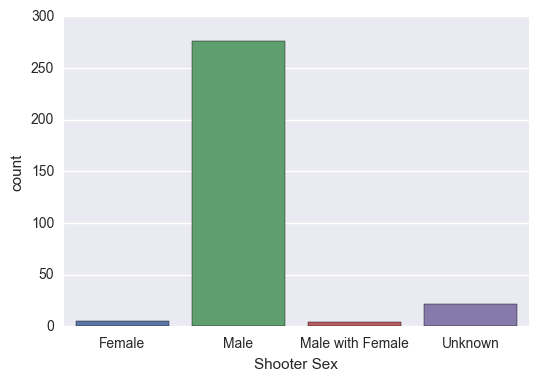

In [314]:
sns.countplot(x = 'Shooter Sex', data = data)

We see that there is a significant disproportion between male and female shooters.

Let's see the number of shooters by ethnicity.

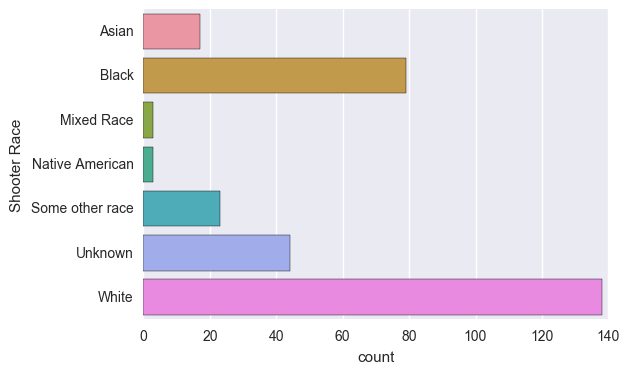

In [315]:
sns.countplot(y = 'Shooter Race', data = data)

From the above graph, we notice that the number of white shooters are almost the double of the next highest number of shooters (black). 

Visualizing the number of shooters based on an age group.

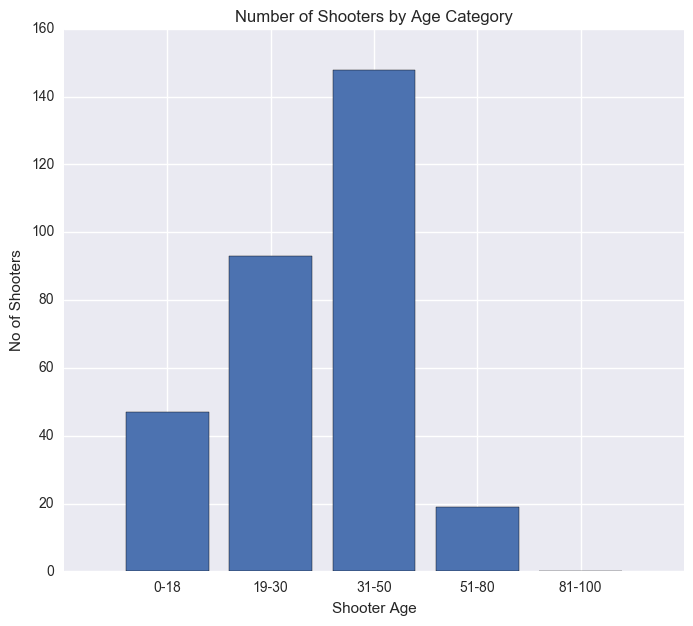

In [316]:
data['Average Shooter Age'] = data['Average Shooter Age'].astype(float)
count_0_18 = 0
count_19_30 = 0
count_31_50 = 0
count_51_80 = 0
count_81_100 = 0
count_NaN = 0
for i in data['Average Shooter Age']:
    
    if i > 0 and i <= 18:
        count_0_18 += 1
    elif i > 18 and i <= 30:
        count_19_30 += 1
    elif i > 30 and i <= 50:
        count_31_50 += 1
    elif i > 50 and i <= 80:
        count_51_80 += 1
    elif i > 81 and i <= 100:
        count_81_100 += 1
    else:
        count_NaN += 1


Shooter_Count_List = [count_0_18, count_19_30, count_31_50, count_51_80, count_81_100]

index_list = []

for i in range(len(Shooter_Count_List)):
    index_list.append(i)
    
fig_1 = plt.figure(figsize = (8, 7))
fig_1 = plt.bar(left = Series(index_list) + 0.60,height = Shooter_Count_List)

plt.xticks(range(1, 6), ('0-18', '19-30', '31-50', '51-80', '81-100'))
plt.xlabel("Shooter Age")
plt.ylabel("No of Shooters")
plt.title("Number of Shooters by Age Category")
plt.show()


Most number of shooters are middle-aged. It's also disturbing to see that there is a significant number of teenage shooters.

Visualising the mental health status of the shooters to gain insights into their mind. 

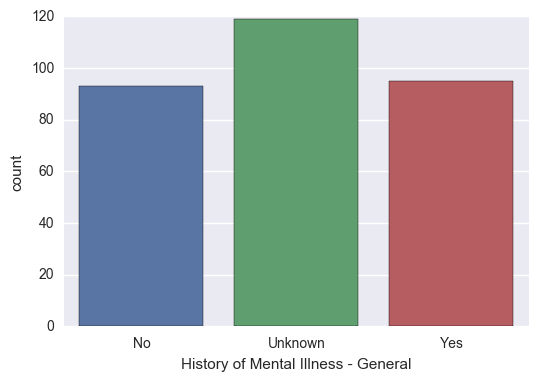

In [317]:
unknown_included = DataFrame(data['History of Mental Illness - General'].replace(np.nan, 'Unknown'))
sns.countplot(x = 'History of Mental Illness - General', data = unknown_included)
#unknown_included

That's interesting. Contrary to what is portrayed in the media, mental illness does not appear to be the root cause of mass shooting as there are equally non-mental shooters. One caveat to be noted is the number of Unknown is high. So we cannot conclude.

Viewing the number of mass shootings incidents in each state to see which states are more prone to the attacks.

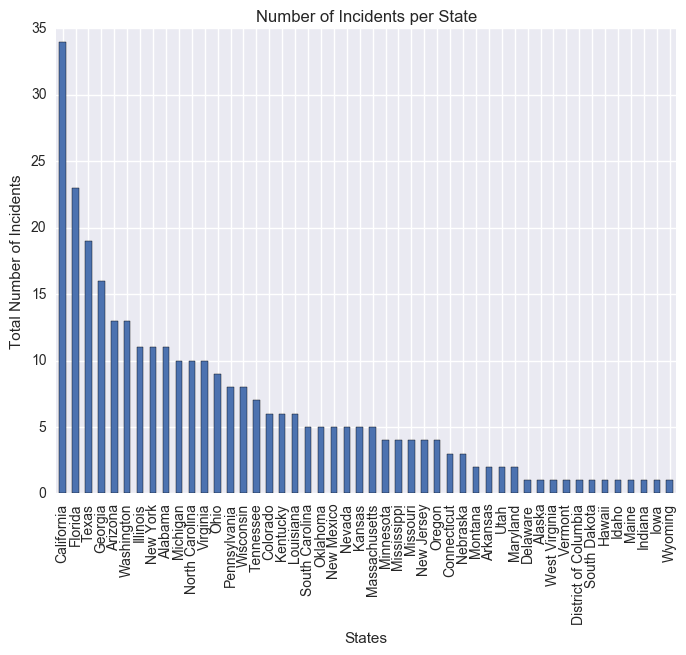

In [318]:

f, ax = plt.subplots(figsize=(8, 6))
plt.title("Number of Incidents per State")
plt.ylabel("Total Number of Incidents")
plt.xlabel("States")
data['State'].value_counts().plot(kind = 'bar')


California has the highest number of mass shooting incidents. Wyoming, the least.

Visualizing total number of attacks per year.

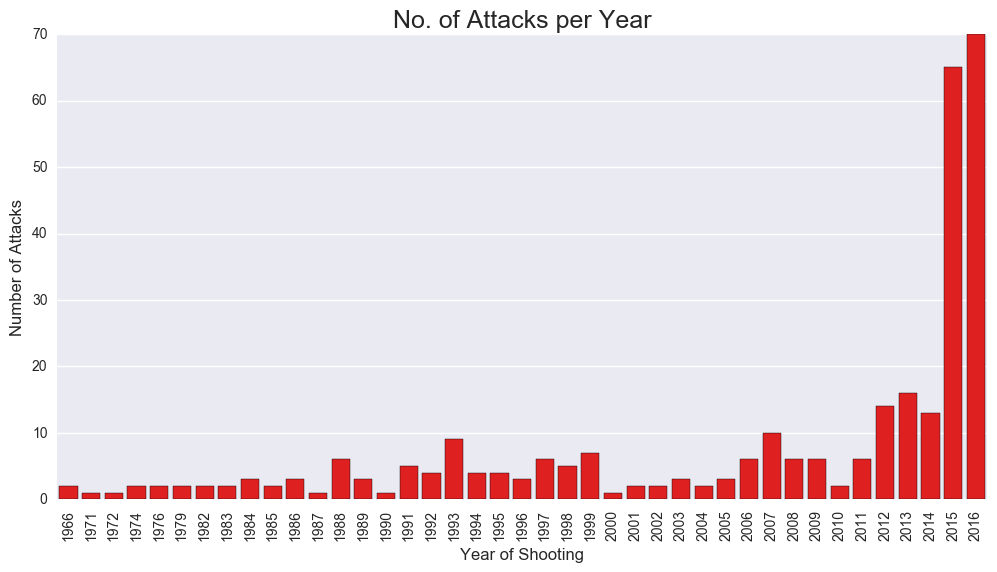

In [319]:
#color = sns.color_palette()
cnt_srs = data['Year'].value_counts()
plt.figure(figsize=(12,6))
#sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8, color='r')
sns.countplot(x = data['Year'], color = 'r')
plt.xticks(rotation='vertical')
plt.xlabel('Year of Shooting', fontsize=12)
plt.ylabel('Number of Attacks', fontsize=12)
plt.title('No. of Attacks per Year', fontsize=18)
plt.show()
# data['Year']

A sudden increase in the number of mass shooting incidents in the year 2015 and 2016 is to be noted.

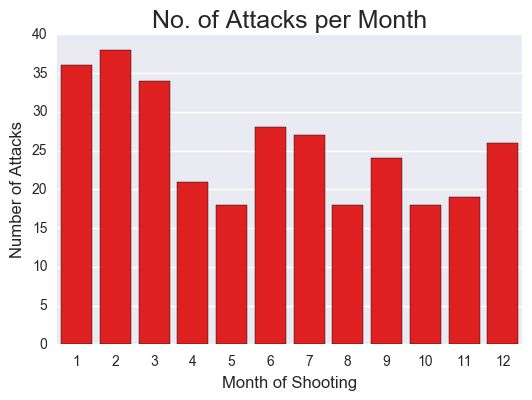

In [320]:
sns.countplot(x = data['Month'], color = 'r')
#plt.xticks(rotation='vertical')
plt.xlabel('Month of Shooting', fontsize=12)
plt.ylabel('Number of Attacks', fontsize=12)
plt.title('No. of Attacks per Month', fontsize=18)
plt.show()

January, February, March has the highest number of mass shooting incidents.

Checking which days of the week are more deadly.

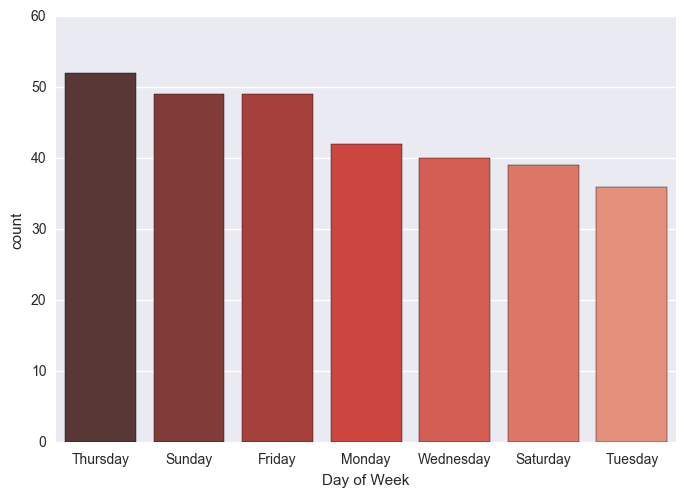

In [321]:
sns.set(style='darkgrid')
sns.countplot(x = 'Day of Week', data = data, order = data['Day of Week'].value_counts().index,  palette="Reds_d")

Thursday, Sunday, and Friday have the highest number of mass shooting incidents.

Checking how many attacks happen on a weekend vs normal weekdays

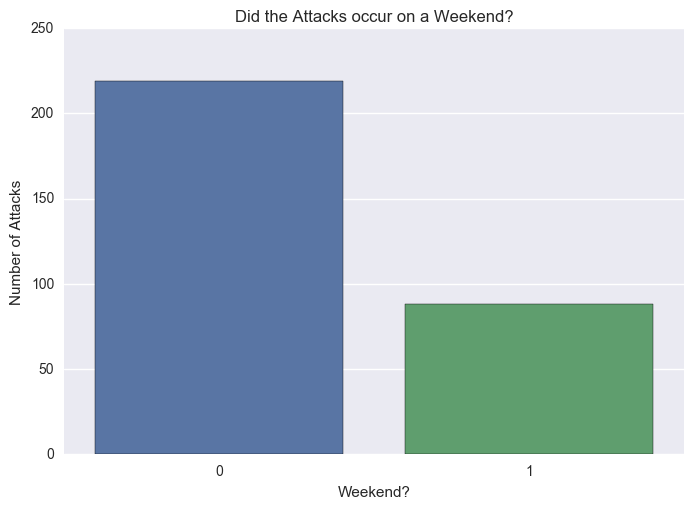

In [322]:
#Need to Plot normal week vs weekend days

sns.countplot(x = data['Weekend'])
plt.title("Did the Attacks occur on a Weekend?")
plt.ylabel("Number of Attacks")
plt.xlabel("Weekend?")

Almost the double number of attacks occur on a weekday as compared to a weekend.

In [323]:
import matplotlib.cm as cm
import matplotlib as mpl
from geopy.geocoders import Nominatim
import plotly
import plotly.plotly as py
import plotly.graph_objs as go
from plotly import tools
from plotly.offline import iplot, init_notebook_mode
#init_notebook_mode()


In [324]:
data['text'] = data['Date'].dt.strftime('%B %-d') + ', ' + data['Number of Victim Fatalities'].astype(str) + ' Number of Victim Fatalities'

data2 = [dict(
        type = 'scattergeo',
        locationmode = 'USA-states',
        lon = data[data.Longitude < 0]['Longitude'],
        lat = data[data.Longitude < 0]['Latitude'],
        text = data[data.Longitude < 0]['text'],
        mode = 'markers',
        marker = dict( 
            size = data[data.Longitude < 0]['Number of Victim Fatalities'] ** 0.5 * 5,
            opacity = 0.75,
            color = 'rgb(215, 0, 0)')
        )]

layout = dict(
         title = 'Shooting Fatalities by Latitude/Longitude in United States <br>'
                 '<sub>Hover to View Date and Fatalitiess</sub>',
         geo = dict(
             scope = 'usa',
             projection = dict(type = 'albers usa'),
             showland = True,
             landcolor = 'rgb(250, 250, 250)',
             subunitwidth = 1,
             subunitcolor = 'rgb(217, 217, 217)',
             countrywidth = 1,
             countrycolor = 'rgb(217, 217, 217)',
             showlakes = True,
             lakecolor = 'rgb(255, 255, 255)')
         )

plotly.offline.init_notebook_mode(connected = True)
figure = dict(data = data2, layout = layout)
plotly.offline.iplot(figure)

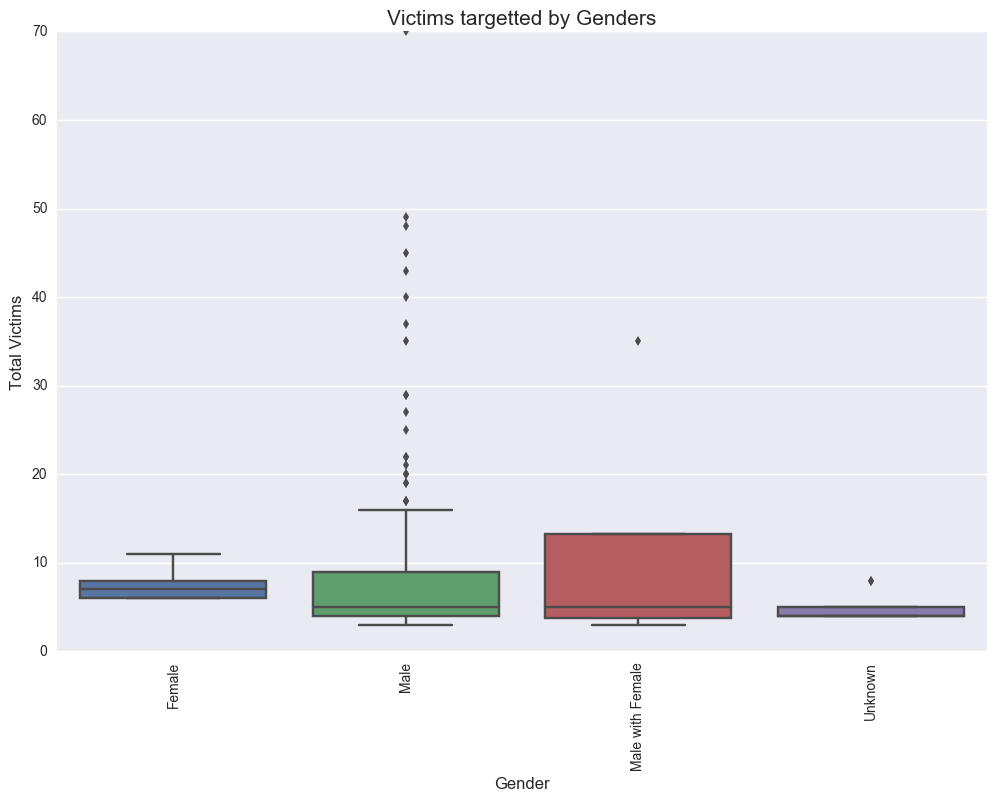

In [325]:
plt.figure(figsize=(12,8))
sns.boxplot(x="Shooter Sex", y="Total Number of Victims", data=data)
plt.ylabel('Total Victims', fontsize=12)
plt.xlabel('Gender', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Victims targetted by Genders", fontsize=15)


The boxplot graph reveals that Male/Female are deadlier than just Male or Female mass shooters.

In [326]:
data[data['Shooter Sex'] == "Male with Female"][['Shooter Race', 'History of Mental Illness - General', 'State','City', 
                                            'Total Number of Victims']]

,Shooter Race,History of Mental Illness - General,State,City,Total Number of Victims
104,White,No,Washington,Carnation,6.0
162,White,No,Nevada,Las Vegas,3.0
178,White,No,Florida,New Port Richey,4.0
235,Asian,Unknown,California,San Bernardino,35.0


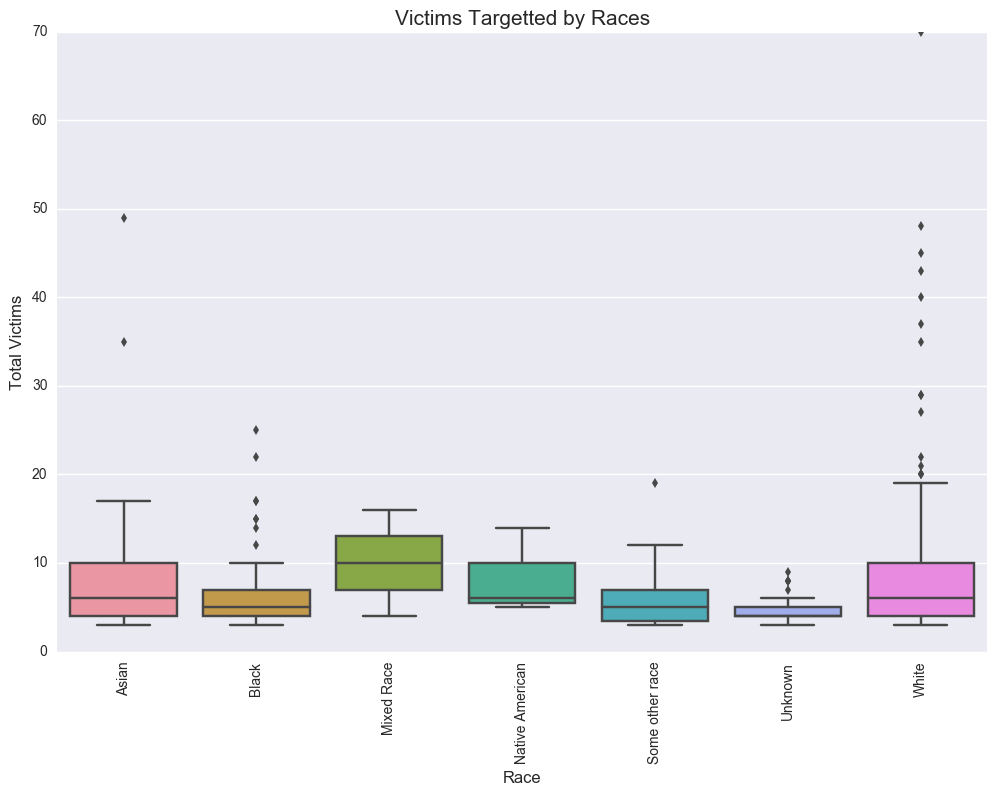

In [327]:
plt.figure(figsize=(12,8))
sns.boxplot(x="Shooter Race", y="Total Number of Victims", data=data)
plt.ylabel('Total Victims', fontsize=12)
plt.xlabel('Race', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Victims Targetted by Races", fontsize=15)

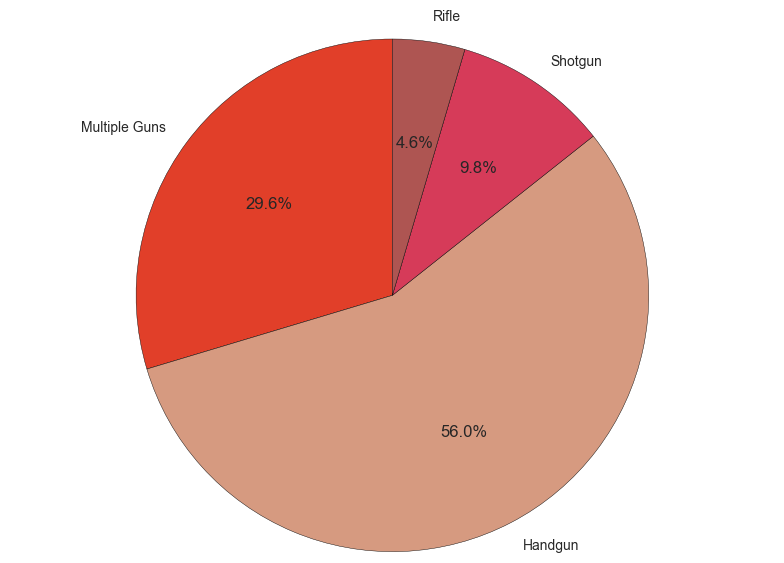

In [262]:
#Type of Gun - General - pie chart
guns = list(data['Type of Gun - General'])
states = list(data['State'])
data_guns = data[data['Type of Gun - General'] == guns][['Shooter Race','Type of Gun - General','Average Shooter Age','State', 'City','Place Type', 'Total Number of Victims']]
data_guns = data_guns.dropna()
#data_guns['Type of Gun - General'].describe()

a = data_guns.groupby('Type of Gun - General').size()
attacks = list(a)
r = data_guns['Type of Gun - General'].unique()
r = list(r)
a2 = pd.DataFrame()
a2 = pd.DataFrame({"Guns": [r[0], r[1] , r[2], r[3]], "Attacks": [attacks[1], attacks[0], attacks[2], attacks[3]]})

# Create a list of colors (from iWantHue)
colors = ["#E13F29", "#D69A80", "#D63B59", "#AE5552", "#CB5C3B", "#EB8076", "#96624E"]

# Create a pie chart
plt.pie(

   a2['Attacks'],

   labels=a2['Guns'],
   # with no shadows
   shadow=False,
   # with colors
   colors=colors,
   # with one slide exploded out
   #explode=(0, 0, 0.15),
   # with the start angle at 90%
   startangle=90,
   # with the percent listed as a fraction
   autopct='%1.1f%%',
   )

# View the plot drop above
plt.axis('equal')

# View the plot
plt.tight_layout()
plt.show()

## Part - III Model Building

### Finding correlation between attacks and gun applications (year-wise)

In [237]:
#Loading the firearm/gun applications dataset
guns_appl = pd.read_csv('firearm_applications.csv')

#Preparing the attacks by year dataset -> s_dates
p = data.groupby('Year').size()
p = list(p)
q = data['Year'].unique()
q = list(q)
data_g = pd.DataFrame({"Year": q, "Attacks": p})
s_dates = pd.DataFrame(data_g)
cols = ['Year', 'Attacks']

#Shootings incidents aka Attacks by year dataset -> s_dates
s_dates = s_dates[cols]


#Gun applications aka Firearm Applications by year dataset -> h_dates
h_dates = pd.DataFrame(guns_appl)

#Merging the two on 'Year'
new_dates = pd.merge(s_dates, h_dates, on="Year")

#new_dates.head()


#Finding the Correlation
#new_dates['Attacks'].corr(new_dates['Firearm Applications’])


Let's find the correlation between the number of attacks versus the number of Firearm Applications.

In [238]:
x = new_dates['Attacks']
y = new_dates['Firearm Applications']

x.corr(y)

0.71482881622545946

Let's try to derive number of Firearm Approvals from Firearm Applications. According to Federal Bureau of Investigation, roughly 66 out of 100 applicants get their firearm application approved.

In [252]:
#plt.scatter(scatterdata.Year, scatterdata['Number of Incidents'])
#plt.scatter(x, y)
#plt.scatter(new_dates.Year, x, c = 'r')
Firearm_Approvals = []
for i in new_dates['Firearm Applications']:
    Firearm_Approvals.append(int(0.66 * i))

new_dates['Firearm_Approvals'] = Firearm_Approvals
#new_dates
new_dates.corr()

,Year,Attacks,Firearm Applications,Firearm_Approvals
Year,1.000000,0.605640,0.940493,0.940493
Attacks,0.605640,1.000000,0.714829,0.714829
Firearm Applications,0.940493,0.714829,1.000000,1.000000
Firearm_Approvals,0.940493,0.714829,1.000000,1.000000


Let's see how statistically significant are the above correlations. We will use the t-test and p-test to determine that.
 <br> Null hypothesis: No correlation between the above variables <br/> <br> Alternate hypothesis: Significant correlation between the above variables <br /> <br> We reject the null hypothesis if our p-value < 0.05 and reject the alternate hypothesis if our p-value > 0.05

In [257]:
from scipy import stats

t1, p1 = stats.ttest_ind(new_dates.Year,new_dates.Attacks)
print("t1 = " + str(t1))
print("p1 = " + str(2*p1))

t2, p2 = stats.ttest_ind(new_dates.Year,new_dates.Firearm_Approvals)
print("t2 = " + str(t2))
print("p2 = " + str(2*p2))

t3, p3 = stats.ttest_ind(new_dates.Attacks,new_dates.Firearm_Approvals)
print("t3 = " + str(t3))
print("p3 = " + str(2*p3))

t1 = 420.737334653
p1 = 9.31756941601e-68
t2 = -8.78918352948
p2 = 3.47110475002e-10
t3 = -8.79117739382
p3 = 3.45159216586e-10


All the three correlations can be accepted as their p-values < 0.05.

Visualizing the correlations via a correlation matrix.

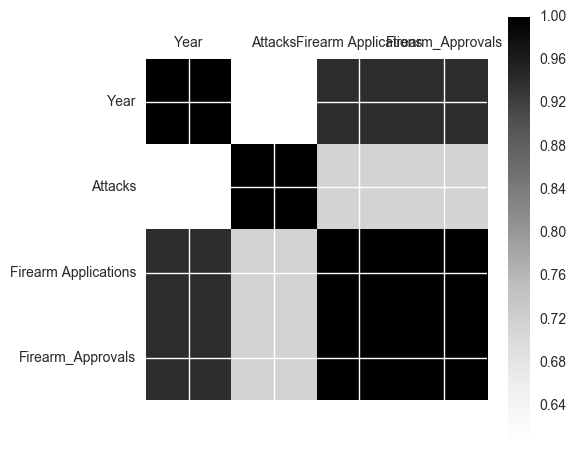

In [261]:
plt.matshow(new_dates.corr())
plt.xticks(range(len(new_dates.columns)), new_dates.columns)
plt.yticks(range(len(new_dates.columns)), new_dates.columns)
plt.colorbar()
plt.show()

### Decision Tree Model

Let's build a decision tree model to predict whether the shooting will occur on a weekend or not. <br />
<br /> <b>Target Variable:</b> Weekend
<br /> <b>Predictor Variables:</b> shown by df.columns below (excluding Date, Year, Month)

In [200]:
df = data.drop(['Title', 'Description', 'Shooter Age(s)', 'Type of Gun - Detailed', 
               'text', 'Shooter Name', 'Day of Week', 'Day'], axis = 1)



In [201]:
df.columns

Index(['City', 'State', 'Latitude', 'Longitude', 'Number of Victim Fatalities',
       'Total Number of Fatalities', 'Number of Victims Injured',
       'Total Number of Victims', 'Date', 'Average Shooter Age', 'Shooter Sex',
       'Shooter Race', 'Type of Gun - General', 'Number of Shotguns',
       'Number of Rifles', 'Number of Handguns', 'Total Number of Guns',
       'Number of Automatic Guns', 'Number of Semi-Automatic Guns',
       'Fate of Shooter at the scene', 'Shooter's Cause of Death',
       'School Related', 'Place Type', 'Relationship to Incident Location',
       'Targeted Victim/s - General', 'Possible Motive - General',
       'History of Mental Illness - General', 'Military Experience', 'Class',
       'Year', 'Month', 'on_holidays', 'Weekend'],
      dtype='object')

In [202]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307 entries, 0 to 306
Data columns (total 33 columns):
City                                   307 non-null category
State                                  307 non-null category
Latitude                               307 non-null float64
Longitude                              307 non-null float64
Number of Victim Fatalities            307 non-null float64
Total Number of Fatalities             307 non-null float64
Number of Victims Injured              307 non-null float64
Total Number of Victims                307 non-null float64
Date                                   307 non-null datetime64[ns]
Average Shooter Age                    307 non-null float64
Shooter Sex                            307 non-null category
Shooter Race                           307 non-null category
Type of Gun - General                  307 non-null category
Number of Shotguns                     307 non-null float64
Number of Rifles                       307 

In [203]:

df_numeric = df.select_dtypes(include = ['float64', 'int64'])

df_numeric.head()

,Latitude,Longitude,Number of Victim Fatalities,Total Number of Fatalities,Number of Victims Injured,Total Number of Victims,Average Shooter Age,Number of Shotguns,Number of Rifles,Number of Handguns,Total Number of Guns,Number of Automatic Guns,Number of Semi-Automatic Guns,Year,Month,on_holidays,Weekend
0,30.198887,-97.844159,16.0,17.0,32.0,48.0,25.0,1.0,3.0,3.0,7.0,0.0,1.0,1966,1,0,0
1,33.422687,-111.816320,5.0,5.0,1.0,6.0,18.0,0.0,0.0,1.0,1.0,0.0,0.0,1966,12,0,1
2,30.068724,-89.931474,9.0,10.0,13.0,22.0,23.0,0.0,1.0,1.0,2.0,0.0,1.0,1972,12,0,1
3,41.839280,-87.688181,1.0,1.0,3.0,4.0,14.0,0.0,0.0,2.0,2.0,0.0,0.0,1974,1,0,0
4,42.081854,-78.432139,3.0,3.0,7.0,10.0,17.0,1.0,1.0,0.0,2.0,0.0,0.0,1974,12,0,0


In [204]:
df_categorical = df.select_dtypes(include = ['category'])

df_categorical.head()

,City,State,Shooter Sex,Shooter Race,Type of Gun - General,Fate of Shooter at the scene,Shooter's Cause of Death,School Related,Place Type,Relationship to Incident Location,Targeted Victim/s - General,Possible Motive - General,History of Mental Illness - General,Military Experience,Class
0,Austin,Texas,Male,White,Multiple Guns,Deceased,Killed,Yes,Educational,Schooling,General Public,Personal Problems,Yes,Yes,SPK
1,Mesa,Arizona,Male,White,Handgun,Arrested,Not Applicable,Yes,Educational,None,School Related,Personal Problems,Yes,Unknown,MS
2,New Orleans,Louisiana,Male,Black,Multiple Guns,Deceased,Killed,No,Government Facility,Government Facility,Government Related,Targeting a Specific Group,Yes,Unknown,SPK
3,Chicago,Illinois,Male,Unknown,Handgun,Arrested,Not Applicable,Yes,Educational,Schooling,School Related,General Rejection,Yes,Unknown,MS
4,Olean,New York,Male,White,Multiple Guns,Arrested,Not Applicable,Yes,Educational,Schooling,General Public,Personal Problems,No,Unknown,MS


Generating dummy variables for Categorical Columns

In [205]:
df_categorical_dummies = pd.get_dummies(df_categorical)

df_categorical_dummies.head()

,City_Aiken,City_Albuquerque,City_Alturas,City_Amarillo,City_Arvada,City_Atlanta,City_Auburn,City_Aurora,City_Austin,City_Baltimore,...,History of Mental Illness - General_No,History of Mental Illness - General_Unknown,History of Mental Illness - General_Yes,Military Experience_No,Military Experience_Unknown,Military Experience_Yes,Class_FMS,Class_GD,Class_MS,Class_SPK
0,0,0,0,0,0,0,0,0,1,0,...,0,0,1,0,0,1,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,1,0


In [206]:
df_concat_numeric_categorical = pd.concat([df_numeric, df_categorical_dummies], axis = 1)

df_concat_numeric_categorical.head()

,Latitude,Longitude,Number of Victim Fatalities,Total Number of Fatalities,Number of Victims Injured,Total Number of Victims,Average Shooter Age,Number of Shotguns,Number of Rifles,Number of Handguns,...,History of Mental Illness - General_No,History of Mental Illness - General_Unknown,History of Mental Illness - General_Yes,Military Experience_No,Military Experience_Unknown,Military Experience_Yes,Class_FMS,Class_GD,Class_MS,Class_SPK
0,30.198887,-97.844159,16.0,17.0,32.0,48.0,25.0,1.0,3.0,3.0,...,0,0,1,0,0,1,0,0,0,1
1,33.422687,-111.816320,5.0,5.0,1.0,6.0,18.0,0.0,0.0,1.0,...,0,0,1,0,1,0,0,0,1,0
2,30.068724,-89.931474,9.0,10.0,13.0,22.0,23.0,0.0,1.0,1.0,...,0,0,1,0,1,0,0,0,0,1
3,41.839280,-87.688181,1.0,1.0,3.0,4.0,14.0,0.0,0.0,2.0,...,0,0,1,0,1,0,0,0,1,0
4,42.081854,-78.432139,3.0,3.0,7.0,10.0,17.0,1.0,1.0,0.0,...,1,0,0,0,1,0,0,0,1,0


In [207]:
# df_concat_numeric_categorical_noNaN = df_concat_numeric_categorical.dropna()

df_concat_numeric_categorical.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307 entries, 0 to 306
Columns: 365 entries, Latitude to Class_SPK
dtypes: float64(13), int64(4), uint8(348)
memory usage: 157.5 KB


In [109]:
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree

X = df_concat_numeric_categorical.drop('Weekend', axis = 1)
Y = DataFrame(df_concat_numeric_categorical['Weekend'])

X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size = 0.2)

clf_gini = DecisionTreeClassifier(criterion = "entropy")#,
                               #max_depth=5, min_samples_leaf=1)
clf_gini.fit(X_train, y_train)

Y_pred = clf_gini.predict(X_test)

print("Accuracy is ", accuracy_score(y_test,Y_pred)*100)

Accuracy is  77.4193548387


We get an accuracy of 77.41. Since we have a class imbalance problem (more than number of 0's (weekdays) than 1's (weekends), we will use the roc curve as our evaluation metric to get a clearer picture of our model's performance.

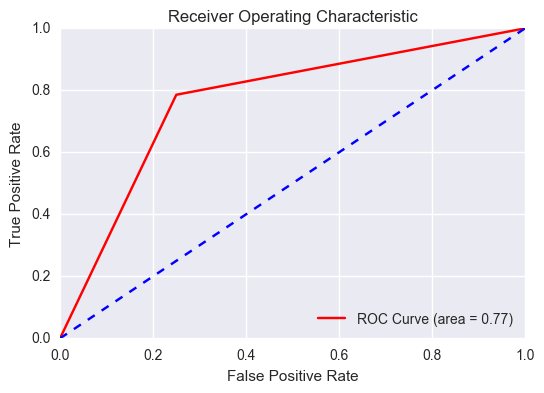

In [144]:
from sklearn import preprocessing
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, Y_pred)

decision_tree_roc_curve = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color = 'red', label = 'ROC Curve (area = %0.2f)' %decision_tree_roc_curve)

plt.plot([0,1], [0, 1], color = 'blue', linestyle = '--')
plt.xlim([0.0, 1.00])
plt.ylim([0.0, 1.00])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


We get the ROC Curve = 0.77, which is not bad.

Let's try predicting the mental illness of a shooter, given a shooting has occured. <br /> <br />
<b>Target Variable:</b> 'History of Mental Illness - General' <br /> <br />
<b> Predictor Variables:</b> Same as the above model 

In [209]:
df2 = DataFrame(df)
df2_numeric = df2.select_dtypes(include = ['float64', 'int64'])
df2_categorical = df2.select_dtypes(include = ['category'])

df2_categorical_dummies = pd.get_dummies(df2_categorical)

df2_categorical_dummies.head()


,City_Aiken,City_Albuquerque,City_Alturas,City_Amarillo,City_Arvada,City_Atlanta,City_Auburn,City_Aurora,City_Austin,City_Baltimore,...,History of Mental Illness - General_No,History of Mental Illness - General_Unknown,History of Mental Illness - General_Yes,Military Experience_No,Military Experience_Unknown,Military Experience_Yes,Class_FMS,Class_GD,Class_MS,Class_SPK
0,0,0,0,0,0,0,0,0,1,0,...,0,0,1,0,0,1,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,1,0


In [211]:
df2_categorical_dummies.drop(['History of Mental Illness - General_No', 'History of Mental Illness - General_Yes',
                             'History of Mental Illness - General_Unknown'], axis = 1, inplace = True)
df2_categorical_dummies['History of Mental Illness - General'] = df['History of Mental Illness - General']

df2_categorical_dummies['History of Mental Illness - General'].head()

0    Yes
1    Yes
2    Yes
3    Yes
4     No
Name: History of Mental Illness - General, dtype: category
Categories (3, object): [No, Unknown, Yes]

In [215]:
df2_concat_numeric_categorical = pd.concat([df2_numeric, df2_categorical_dummies], axis = 1)

df2_concat_numeric_categorical.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307 entries, 0 to 306
Columns: 363 entries, Latitude to History of Mental Illness - General
dtypes: category(1), float64(13), int64(4), uint8(345)
memory usage: 157.0 KB


In [230]:
label2 = 'History of Mental Illness - General'
X2 = df2_concat_numeric_categorical.drop(label2, axis = 1)
Y2 = DataFrame(df2_concat_numeric_categorical[label2])

X2_train, X2_test, y2_train, y2_test = train_test_split( X2, Y2, test_size = 0.2)

clf_gini2 = DecisionTreeClassifier(criterion = "entropy")#,
                               #max_depth=5, min_samples_leaf=1)
clf_gini2.fit(X2_train, y2_train)

Y2_pred = clf_gini2.predict(X2_test)

print("Accuracy is ", accuracy_score(y2_test,Y2_pred)*100)

Accuracy is  62.9032258065


The accuracy comes out to 62.9 which is not optimal. Looks like our predictor variables are not catching the complexity of the target variable (or) are not predictive enough for our target variable.

### Time Series Model

Here, we will built a model to predict the number of attacks over a period of time

In [338]:
time_series_data = DataFrame(data = data, columns = ['Year', 'Total Number of Victims'])

from collections import defaultdict, deque
time_dict = defaultdict(deque)
for i in range(1966, 2017):
    time_dict['Year'].append(i)
    time_dict['Total Number of Victims'].append(time_series_data.loc[time_series_data['Year'] == i, 'Total Number of Victims'].sum())


#time_dict
temp_df = DataFrame.from_dict(time_dict)

temp_df.head()

,Total Number of Victims,Year
0,54.0,1966
1,0.0,1967
2,0.0,1968
3,0.0,1969
4,0.0,1970


In [339]:
no_of_incidents = []
for i in range(1966, 2017):
    no_of_incidents.append(len(time_series_data.loc[time_series_data['Year'] == i]))

#time_series_data['Number of Incidents'] = no_of_incidents
no_of_incidents

[2,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 2,
 0,
 2,
 0,
 0,
 2,
 0,
 0,
 2,
 2,
 3,
 2,
 3,
 1,
 6,
 3,
 1,
 5,
 4,
 9,
 4,
 4,
 3,
 6,
 5,
 7,
 1,
 2,
 2,
 3,
 2,
 3,
 6,
 10,
 6,
 6,
 2,
 6,
 14,
 16,
 13,
 65,
 70]

In [340]:
#DataFrame.to_csv(temp_df, "time_series_data.csv", index = False)
date_parse = lambda dates: pd.datetime.strptime(dates, '%Y')

In [341]:
tsdata = pd.read_csv("time_series_data.csv", index_col = 'Year', date_parser=date_parse)
tsdata['Number of Incidents'] = no_of_incidents
tsdata['Number of Incidents'] = tsdata['Number of Incidents'].astype('float')
tsdata.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 51 entries, 1966-01-01 to 2016-01-01
Data columns (total 2 columns):
Total Number of Victims    51 non-null float64
Number of Incidents        51 non-null float64
dtypes: float64(2)
memory usage: 1.2 KB


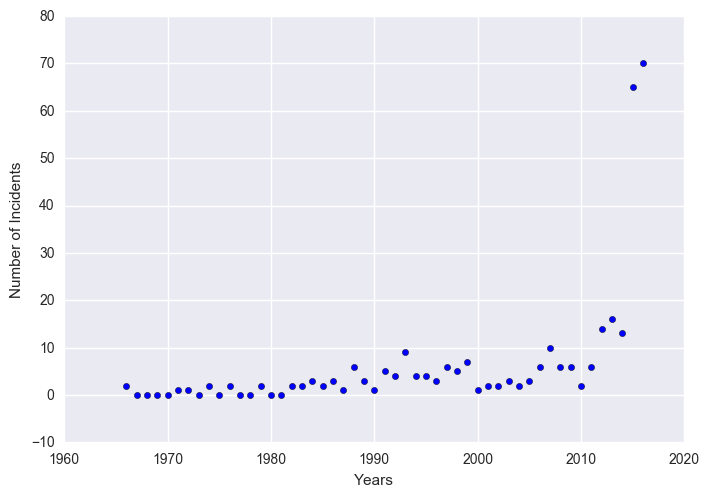

In [356]:
scatterdata = pd.read_csv("time_series_data.csv")
scatterdata['Number of Incidents'] = no_of_incidents
plt.scatter(scatterdata.Year, scatterdata['Number of Incidents'])
plt.xlabel("Years")
plt.ylabel("Number of Incidents")

/Applications/anaconda/lib/python3.5/site-packages/PIL/Image.py:77: RuntimeWarning:

The _imaging extension was built for another version of Pillow or PIL: Core Version: 4.3.0Pillow Version:  3.0.0

/Applications/anaconda/lib/python3.5/site-packages/statsmodels/compat/pandas.py:56: FutureWarning:

The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.



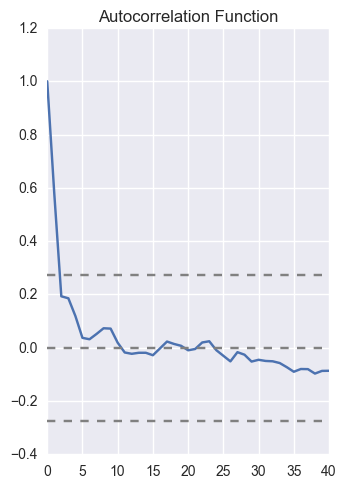

In [343]:
from statsmodels.tsa.stattools import acf, pacf

ts_column = tsdata['Number of Incidents']

acf_cases = acf(ts_column)
pacf_cases = pacf(ts_column, nlags = 20, method = 'ols')

plt.subplot(121)
plt.plot(acf_cases)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_column)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_column)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

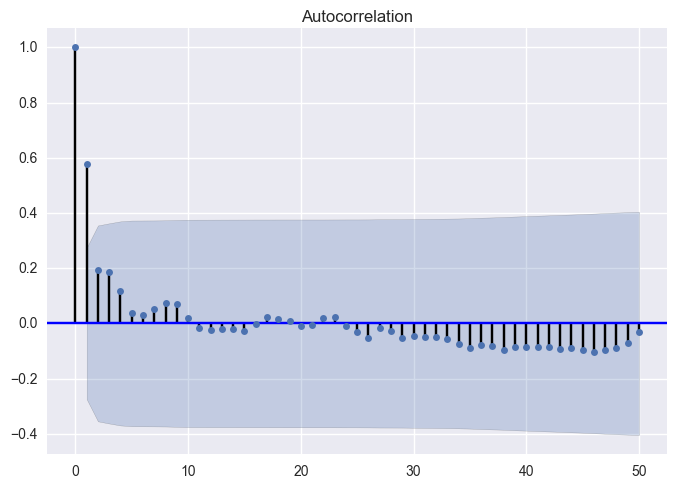

In [345]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig_first = plot_acf(ts_column)

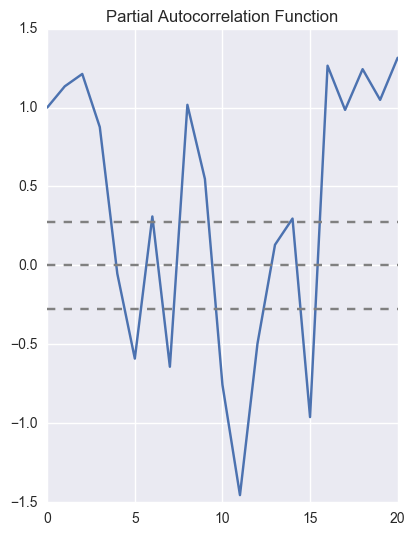

In [346]:
plt.subplot(122)
plt.plot(pacf_cases)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_column)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_column)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

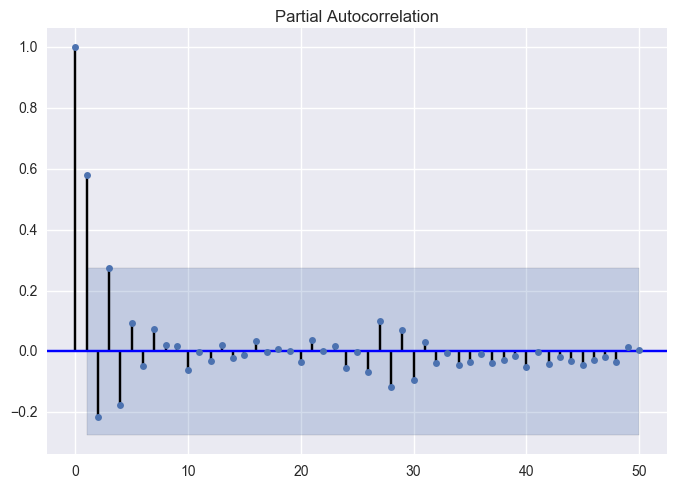

In [347]:
fig_second = plot_pacf(ts_column)

Let's try to detect autocorrelation via the durbin_watson test. If the test value is closer to 0, we have autocorrelation. If it's closer to 0, we have no autocorrelation.

In [348]:
from statsmodels.stats.stattools import durbin_watson

durbin_watson(ts_column)

0.29635331473106896

We observe that there is indeed autocorrelation present as the test value is closer to 0.

Let us build an ARMA model to forecast number of attacks.

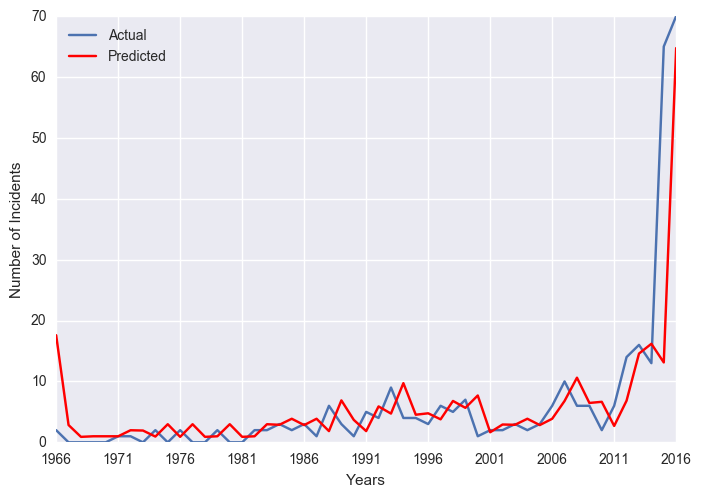

In [365]:
from statsmodels.tsa.arima_model import ARMA
#from statsmodels.tsa.arima_model import ARIMA

model_AR = ARMA(ts_column, order=(2, 0))  
results_AR = model_AR.fit()  
plt.plot(ts_column, label = 'Actual')
plt.plot(results_AR.fittedvalues, color='red', label = 'Predicted')
plt.xlabel("Years")
plt.ylabel("Number of Incidents")
plt.legend(loc = "upper left")

We observe that the ARMA model does a good job fitting the data.

Let's check if the residuals are of normal distribution. 

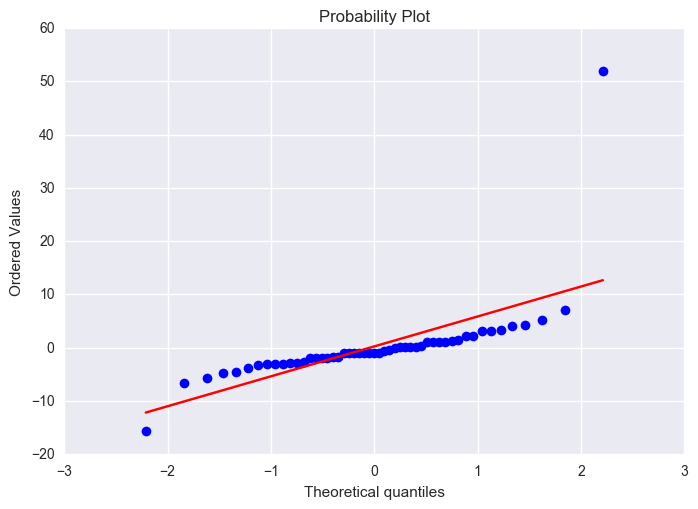

NormaltestResult(statistic=91.92873763907339, pvalue=1.0912600528295913e-20)


In [351]:
import pylab
import scipy.stats as stats

#checking whether the residuals are of normal distribution, dist = "norm" is effectively our null hypothesis
stats.probplot(results_AR.resid, dist = "norm", plot = pylab)
pylab.show()
stats.normaltest
print(stats.normaltest(results_AR.resid))

We observe that the residuals are not normally distributed.

Let us forecast the values from 2006 to 2016.

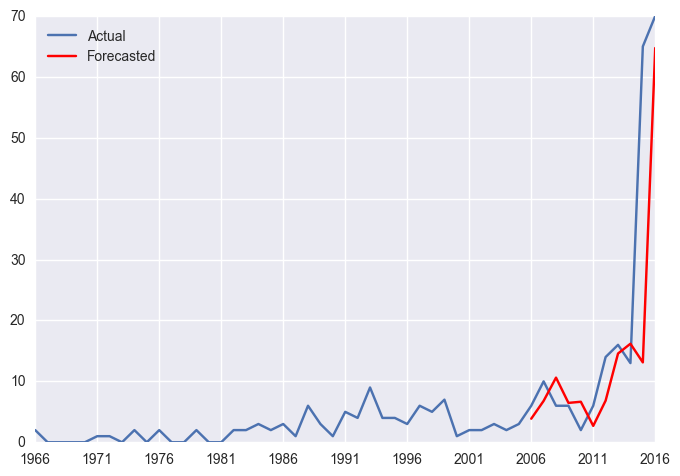

In [364]:
tsdata['FORECAST'] = results_AR.predict(start = '2006-01-01', end = '2016-01-01', dynamic = False)

plt.plot(tsdata['Number of Incidents'], label = 'Actual')
plt.plot(tsdata['FORECAST'], color = 'red', label = 'Forecasted')
plt.legend(loc = "upper left")
#data.tail(200)

In [353]:
#ts_column[48:51]
tsdata['FORECAST'][40:51]

Year
2006-01-01     3.871150
2007-01-01     6.795029
2008-01-01    10.615699
2009-01-01     6.468126
2010-01-01     6.654928
2011-01-01     2.694156
2012-01-01     6.841729
2013-01-01    14.576471
2014-01-01    16.183253
2015-01-01    13.119274
2016-01-01    64.749405
Name: FORECAST, dtype: float64

Let us evaluate the performance of our ARMA model.<br /> <br />
We will use three evaluation metrics: <br /> <br />
1. Mean Absolute Error <br /> <br />
2. Mean Forecast Error <br /> <br />
3. Root Mean Square Error <br /> <br />

The closer the value to 0, the better the performance of our model.

In [354]:
from decimal import Decimal

actual_values = ts_column[40:51]
predicted_values = tsdata['FORECAST'][40:51]

def Mean_Absolute_Error(x,y):
    '''
    x: actual value of type float
    y: predicted value of type float
    returns MAE of type float
    '''
    error = abs(x - y)
    MAE = Decimal( ( np.sum(error) ) / len(error) )
    return round(MAE, 2)

def Mean_Forecast_Error(x,y):
    '''
    x: actual value of type float
    y: predicted value of type float
    returns MFE of type float
    '''
    error = x - y
    MFE = Decimal( ( np.sum(error) ) / len(error) )
    return round(MFE, 2)

print("The Mean Absolute Error is:", Mean_Absolute_Error(actual_values, predicted_values))
print("The Mean Forecast Error is:", Mean_Forecast_Error(actual_values, predicted_values))

The Mean Absolute Error is: 7.93
The Mean Forecast Error is: 5.58


In [355]:
def RMSE(x, y):
    '''
    x: actual value of type float
    y: predicted value of type float
    returns MFE of type float
    '''
    return np.sqrt(((y - x) ** 2).mean())

print("The RMSE is:", RMSE(actual_values, predicted_values))

The RMSE is: 16.1005462372


We observe that our values are not as close to 0 as we expect, but are acceptable since our data size is 307. 